# Email Spam Detection TASK- 4

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import chardet
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
import nltk

In [3]:
data=pd.read_csv("spam.csv",encoding='latin-1')

In [4]:
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [5]:
data.shape

(5572, 5)

In [6]:
data.size

27860

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [8]:
data.describe()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
count,5572,5572,50,12,6
unique,2,5169,43,10,5
top,ham,"Sorry, I'll call later","bt not his girlfrnd... G o o d n i g h t . . .@""","MK17 92H. 450Ppw 16""","GNT:-)"""
freq,4825,30,3,2,2


In [9]:
data.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [10]:
data.describe()

,v1,v2
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [11]:
data.head(10)

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...


In [12]:
data['v1']=encoder.fit_transform(data['v1'])

In [13]:
data.head()

,v1,v2
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [14]:
data.isnull().sum()

v1    0
v2    0
dtype: int64

In [15]:
data.duplicated().sum()

403

In [16]:
data=data.drop_duplicates(keep='first')

In [17]:
data.duplicated().sum()

0

In [18]:
data.shape

(5169, 2)

In [19]:
data.head(10)

,v1,v2
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
5,1,FreeMsg Hey there darling it's been 3 week's n...
6,0,Even my brother is not like to speak with me. ...
7,0,As per your request 'Melle Melle (Oru Minnamin...
8,1,WINNER!! As a valued network customer you have...
9,1,Had your mobile 11 months or more? U R entitle...


In [20]:
data['v1'].value_counts()

v1
0    4516
1     653
Name: count, dtype: int64

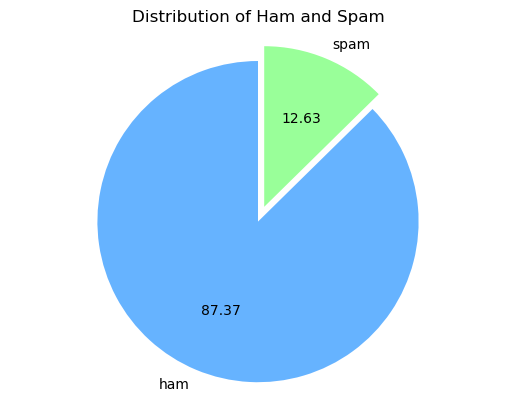

In [21]:
counts = data['v1'].value_counts()
labels = ['ham','spam']
explode = (0, 0.1)  
colors = ['#66b3ff', '#99ff99']
plt.pie(counts, labels=labels, autopct='%0.2f', explode=explode, colors=colors, startangle=90)
plt.axis('equal')  
plt.title('Distribution of Ham and Spam')
plt.show()

In [22]:
data['v2'].apply(len)

0       111
1        29
2       155
3        49
4        61
       ... 
5567    161
5568     37
5569     57
5570    125
5571     26
Name: v2, Length: 5169, dtype: int64

In [23]:
data['num']=data['v2'].apply(len)

In [24]:
data.head(10)

,v1,v2,num
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61
5,1,FreeMsg Hey there darling it's been 3 week's n...,148
6,0,Even my brother is not like to speak with me. ...,77
7,0,As per your request 'Melle Melle (Oru Minnamin...,160
8,1,WINNER!! As a valued network customer you have...,158
9,1,Had your mobile 11 months or more? U R entitle...,154


In [28]:
data['v2'].apply(lambda x:len(nltk.word_tokenize(x)))


0       24
1        8
2       37
3       13
4       15
        ..
5567    35
5568     9
5569    15
5570    27
5571     7
Name: v2, Length: 5169, dtype: int64

In [29]:
data['num_words']=data['v2'].apply(lambda x:len(nltk.word_tokenize(x)))

In [30]:
data.head()

,v1,v2,num,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [31]:
data['v2'].apply(lambda x:nltk.sent_tokenize(x))

0       [Go until jurong point, crazy.., Available onl...
1                        [Ok lar..., Joking wif u oni...]
2       [Free entry in 2 a wkly comp to win FA Cup fin...
3       [U dun say so early hor... U c already then sa...
4       [Nah I don't think he goes to usf, he lives ar...
                              ...                        
5567    [This is the 2nd time we have tried 2 contact ...
5568              [Will Ì_ b going to esplanade fr home?]
5569    [Pity, * was in mood for that., So...any other...
5570    [The guy did some bitching but I acted like i'...
5571                        [Rofl., Its true to its name]
Name: v2, Length: 5169, dtype: object

In [32]:
data['v2'].apply(lambda x:len(nltk.sent_tokenize(x)))

0       2
1       2
2       2
3       1
4       1
       ..
5567    4
5568    1
5569    2
5570    1
5571    2
Name: v2, Length: 5169, dtype: int64

In [33]:
data['sentences']=data['v2'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [34]:
data.head()

,v1,v2,num,num_words,sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [35]:
data[['num','num_words','sentences']].describe()

,num,num_words,sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


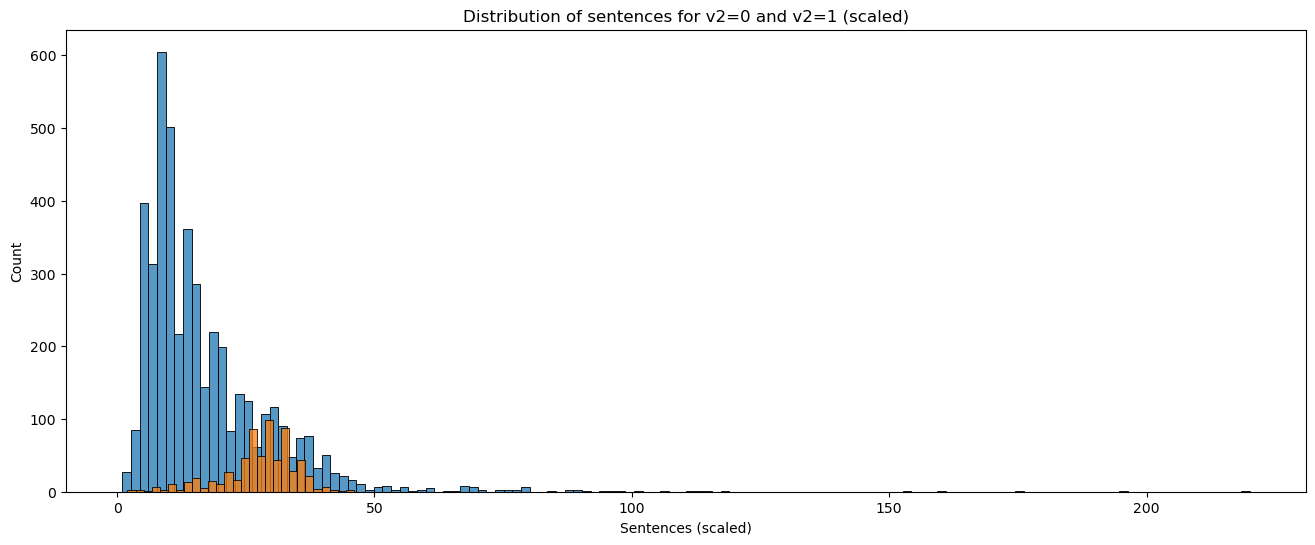

In [36]:

plt.figure(figsize=(16, 6))
sns.histplot(data[data['v1'] == 0]['num_words'])
sns.histplot(data[data['v1'] == 1]['num_words'])
plt.title('Distribution of sentences for v2=0 and v2=1 (scaled)')
plt.xlabel('Sentences (scaled)')
plt.ylabel('Count')
plt.show()

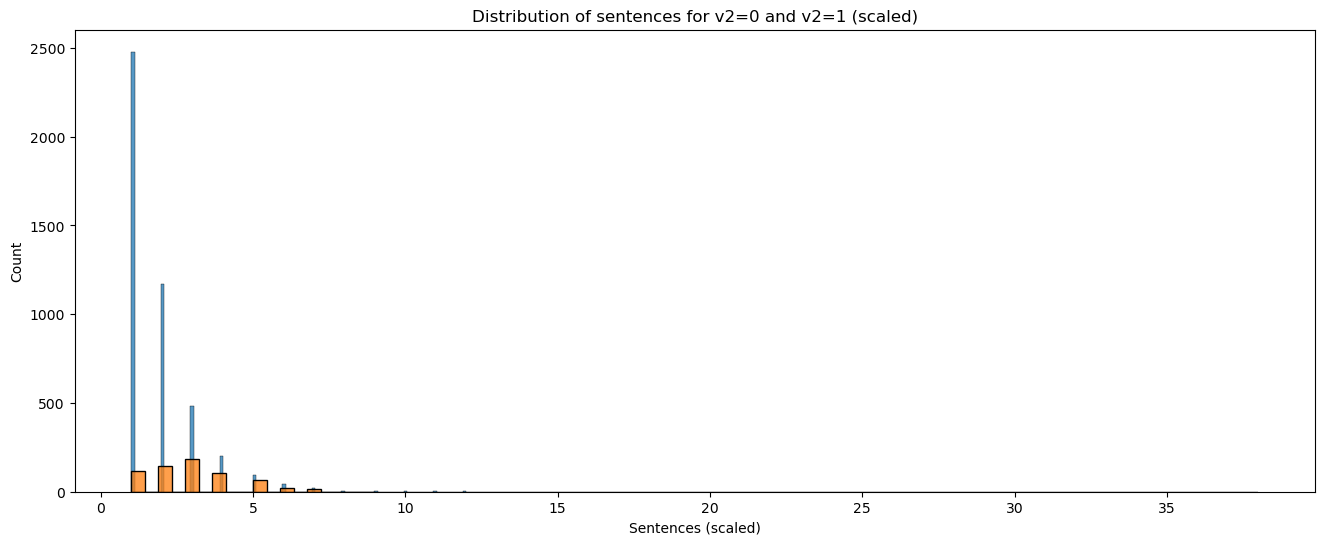

In [37]:
plt.figure(figsize=(16, 6))
sns.histplot(data[data['v1'] == 0]['sentences'])
sns.histplot(data[data['v1'] == 1]['sentences'])
plt.title('Distribution of sentences for v2=0 and v2=1 (scaled)')
plt.xlabel('Sentences (scaled)')
plt.ylabel('Count')
plt.show()

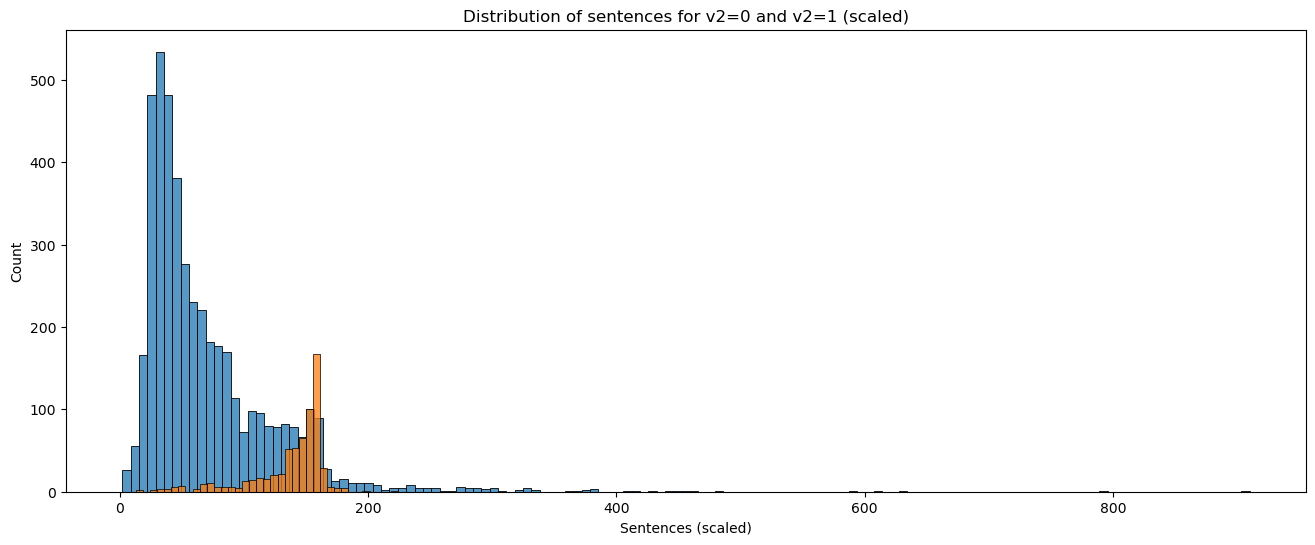

In [38]:
plt.figure(figsize=(16, 6))
sns.histplot(data[data['v1'] == 0]['num'])
sns.histplot(data[data['v1'] == 1]['num'])
plt.title('Distribution of sentences for v2=0 and v2=1 (scaled)')
plt.xlabel('Sentences (scaled)')
plt.ylabel('Count')
plt.show()

C:\Users\KIIT01\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


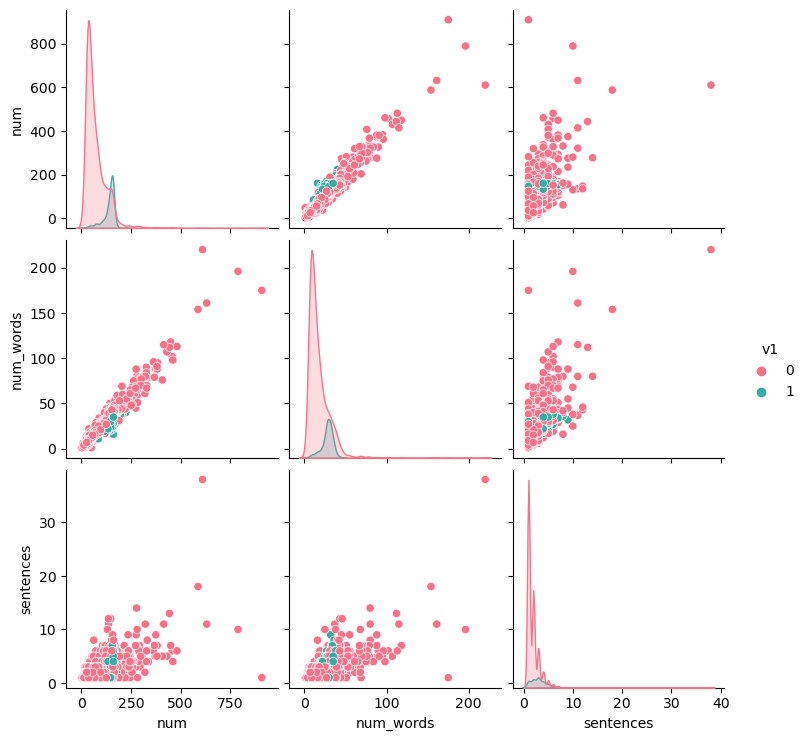

In [39]:
custom_palette = 'husl'
sns.pairplot(data, hue='v1', palette=custom_palette)
plt.show()

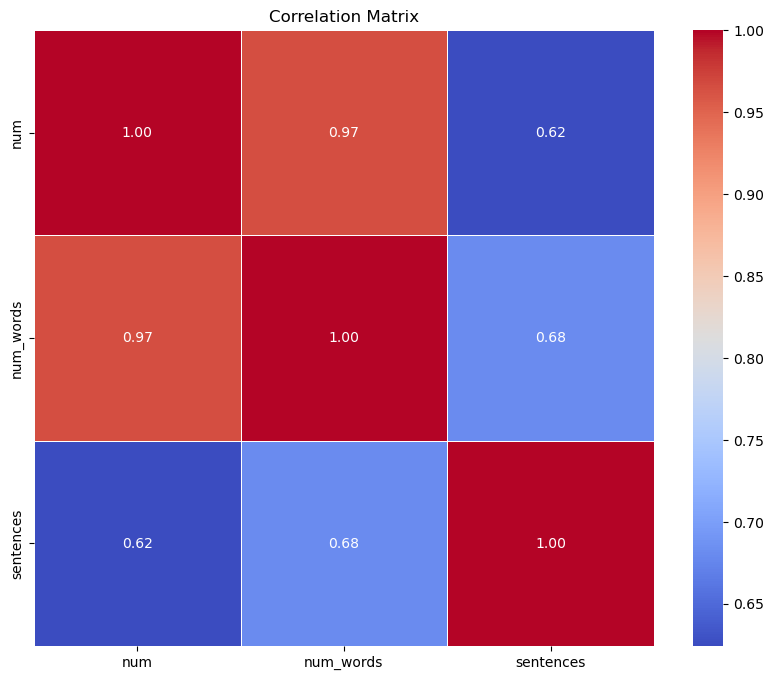

In [40]:
numeric_columns = data.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_columns.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()


In [41]:
  def transform_text(text):
        text=text.lower()
        return text

In [42]:
transform_text('hello how are you')

'hello how are you'

In [43]:
def transform_text1(text1):
        text1=nltk.word_tokenize(text1)
        return text1

In [44]:
transform_text1('hello how are you')

['hello', 'how', 'are', 'you']

In [45]:
def transform_text2(text2):
    y=[]
    for i in text2:
        if i.isalnum():
            y.append(i)
       
    return y

In [46]:
transform_text2('hello how are you % i am good #')

['h',
 'e',
 'l',
 'l',
 'o',
 'h',
 'o',
 'w',
 'a',
 'r',
 'e',
 'y',
 'o',
 'u',
 'i',
 'a',
 'm',
 'g',
 'o',
 'o',
 'd']

In [47]:
def transform_text2k(text2k):
    text2k=text2k.lower()
    text2k=nltk.word_tokenize(text2k)
    y_k=[]
    for i in text2k:
        if i.isalnum():
            y_k.append(i)
       
    return y_k

In [48]:
transform_text2k('hello how are you % i 67 4234n am good #')

['hello', 'how', 'are', 'you', 'i', '67', '4234n', 'am', 'good']

In [49]:
from nltk.corpus import stopwords
nltk.download('stopwords')
stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\KIIT01\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [50]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [51]:
def transform_text3(text3):
    text2k=text3.lower()
    text3=nltk.word_tokenize(text3)
    y_3=[]
    for i in text3:
        if i.isalnum():
            y_3.append(i)
            text3=y_3[:]
            y_3.clear()
    for i in text3:
        if i in stopwords.words('english') and i not in string.punctuation:
            y_3.append(i)
    return y_3

In [52]:
data['v1']=data['v2'].apply(lambda x: 1 if x=='v1' else 0)
data.head()


,v1,v2,num,num_words,sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,0,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [53]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data.v2,data.v1,test_size=0.25)

In [54]:
#by using sklearn pipeline method
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB

from sklearn.pipeline import Pipeline
clf = Pipeline([('vectorizer', CountVectorizer()),('nb', MultinomialNB())])

In [55]:
clf.fit(X_train, y_train)

Pipeline(steps=[('vectorizer', CountVectorizer()), ('nb', MultinomialNB())])

In [56]:
clf.score(X_test,y_test)

1.0

In [57]:
emails = [
' **Exclusive Sales Event!  ' 
 'Dont Miss Out on the Latest Smartphone!' 

'Get a brand new state-of-the-art phone with an incredible 20% OFF during our exclusive sales event! 🌟'  

]

clf.predict(emails)

array([0], dtype=int64)

In [58]:
clf.score(X_test,y_test)

1.0

# HERE WE GOT THE ACCURACY OF 100%